# Bike sharing company faced business crisis. To overcome the issue, company wants to know the variables which are related to grow the bussines and what to do with those variables so that business crisis will overcome.

## The question is:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Goal:

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

# Reading and understanding dataset

- Data taken from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset this website

In [2]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
data.shape

(731, 16)

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.shape

(731, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
data.ndim

2

In [11]:
data1 = data.iloc[ : , 2:8]

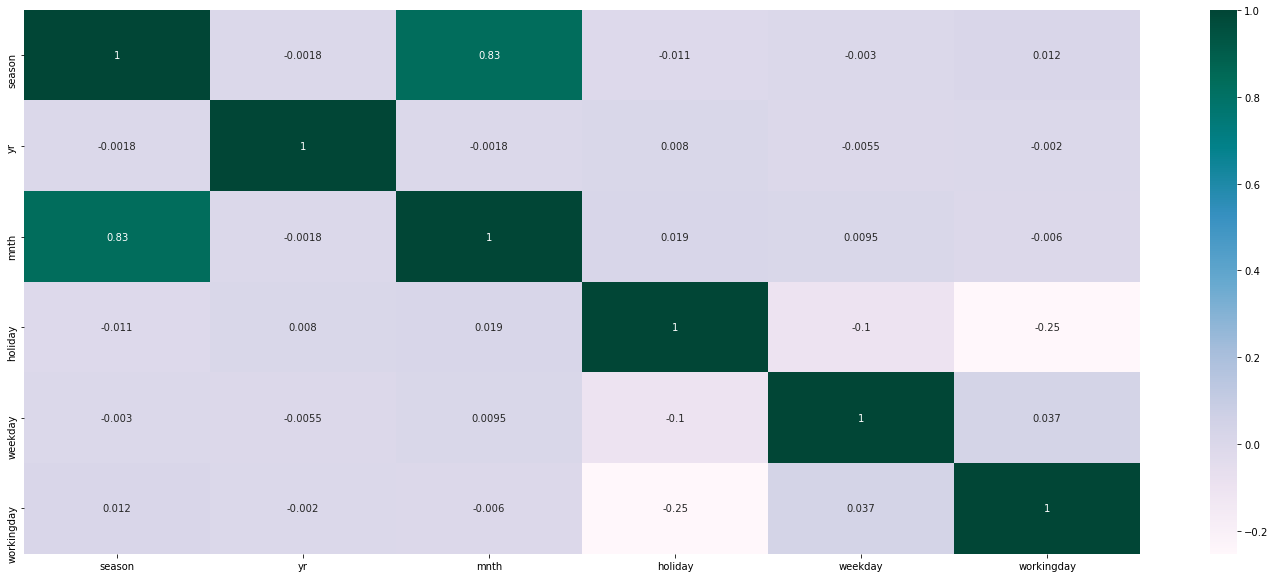

In [12]:
#Calculate Correlation
corr = data1.corr(method = 'spearman')
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='PuBuGn' )
plt.show()

#### There are 731 rows and 16 columns in the data set. There are no null values in any of the columns.

# Cleaning data and preprocessing

### Drop columns that are not useful for analysis

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.
- `holiday` is dropped

In [13]:
#Before dropping date, introducing a days_old variable which indicates how old is the business
data['days_old'] = (pd.to_datetime(data['dteday'],format= '%Y-%m-%d') - pd.to_datetime('01-01-2011',format= '%d-%m-%Y')).dt.days

In [14]:
data.shape

(731, 17)

In [15]:
# Droping instant column as it is index column which has nothing to do with target
data.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
data.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
data.drop(['casual'], axis = 1, inplace = True)
data.drop(['registered'], axis = 1, inplace = True)

# Dropping holiday as it is realated to workingday
data.drop(['holiday'], axis = 1, inplace = True)

In [16]:
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801,1
2,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,2
3,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,3
4,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,4


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
 11  days_old    731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [18]:
data.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [19]:
data.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

- we can see that features like `season`, `mnth`, `weekday` and `weathersit` are integers although they should be non-numerical categories.

In [20]:
corr_matrix = data.corr()
corr_matrix

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000,-0.001844,0.831440,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100,0.412224
yr,-0.001844,1.000000,-0.001792,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.566710,0.866025
mnth,0.831440,-0.001792,1.000000,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977,0.496702
weekday,-0.003080,-0.005461,0.009509,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443,-0.000016
workingday,0.012485,-0.002013,-0.005901,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156,-0.004337
weathersit,0.019211,-0.048727,0.043528,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391,-0.021477
temp,0.334315,0.047604,0.220205,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494,0.150580
atemp,0.342876,0.046106,0.227459,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066,0.152638
hum,0.205445,-0.110651,0.222204,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659,0.016375
windspeed,-0.229046,-0.011817,-0.207502,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.234545,-0.112620


# Handling missing values

In [21]:
#Print number of unique values in all columns
data.nunique()

season          4
yr              2
mnth           12
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
cnt           696
days_old      731
dtype: int64

In [22]:
data.isnull().sum()

season        0
yr            0
mnth          0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

##### There is no missing value

In [23]:
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801,1
2,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,2
3,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,3
4,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,4


In [24]:
print(data.temp.max())
print(data.temp.min())

0.861667
0.0591304


#### From above plots, one can see there are no outliers to be handled. 

# Some EDA to get some inference

In [25]:
data.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [26]:
# coverting season, weathersit, mnth and weekday into categorical data

data.season.replace({1:"winter", 2:"spring", 3:"summer", 4:"fall"},inplace = True)

data.weathersit.replace({1:'good',2:'moderate',3:'bad'},inplace = True)

data.mnth = data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

data.weekday = data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,winter,0,jan,sat,0,moderate,0.344167,0.363625,0.805833,0.160446,985,0
1,winter,0,jan,sun,0,moderate,0.363478,0.353739,0.696087,0.248539,801,1
2,winter,0,jan,mon,1,good,0.196364,0.189405,0.437273,0.248309,1349,2
3,winter,0,jan,tue,1,good,0.200000,0.212122,0.590435,0.160296,1562,3
4,winter,0,jan,wed,1,good,0.226957,0.229270,0.436957,0.186900,1600,4


<Figure size 1080x2160 with 0 Axes>

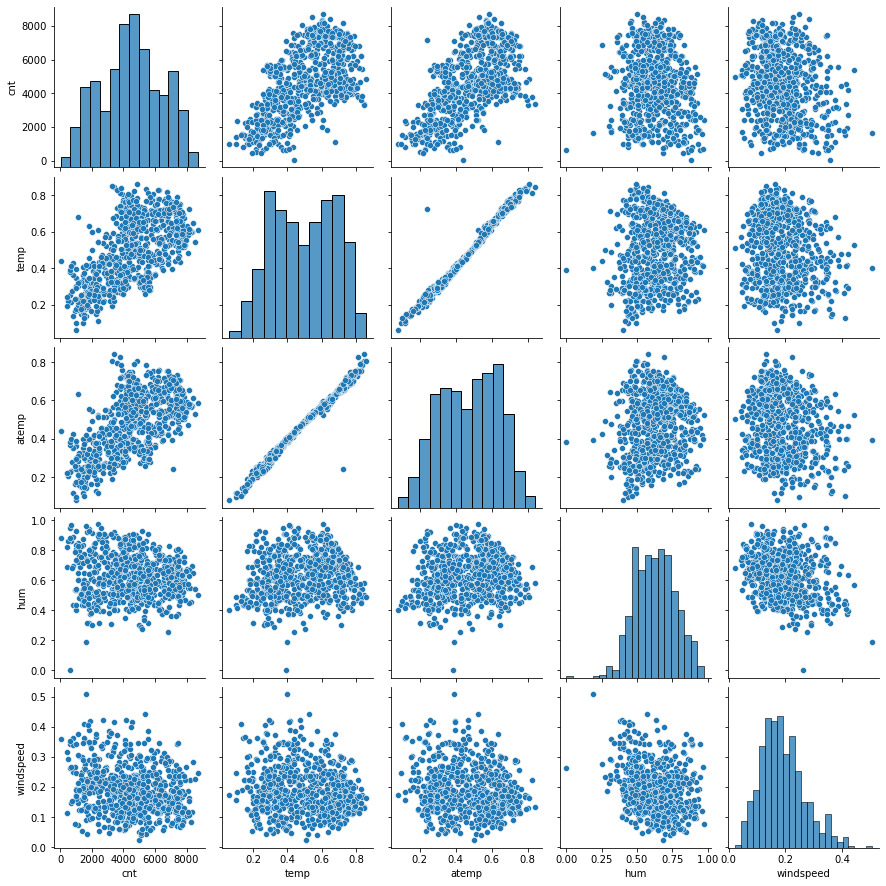

In [27]:
#Drawing pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data = data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### _`Inference`_: 
- Looks like the `temp` and `atemp` has the highest corelation with the target variable cnt
- `temp` and `atemp` are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

###  Visualising the Data to Find the Correlation between the Numerical Variable

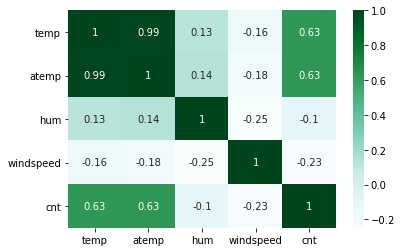

In [28]:
# Checking continuous variables relationship with each other
# BuGn is color maps(sequential)
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Here one can see that `temp` and `atemp` has correlation more than .99 means almost 1 (highly correlated). `atemp` will be dropped.

### Draw Heatmap of correlation between variables

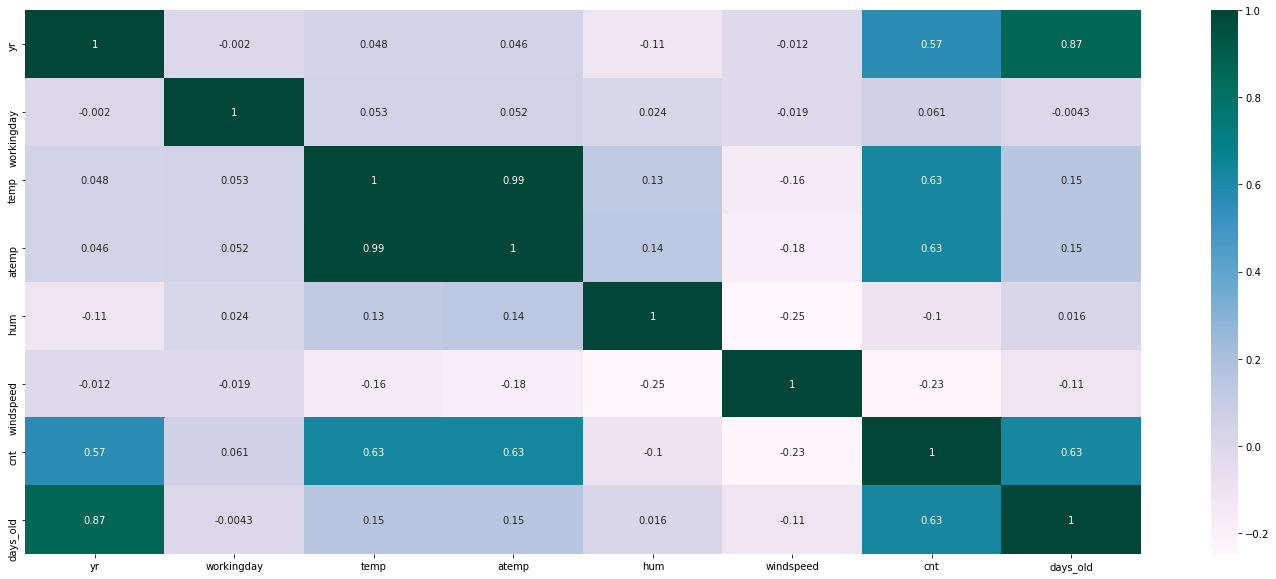

In [29]:
#Calculate Correlation
corr = data.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='PuBuGn' )
plt.show()

In [30]:
data.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

### Analysing Categorical Variabels with target variables 

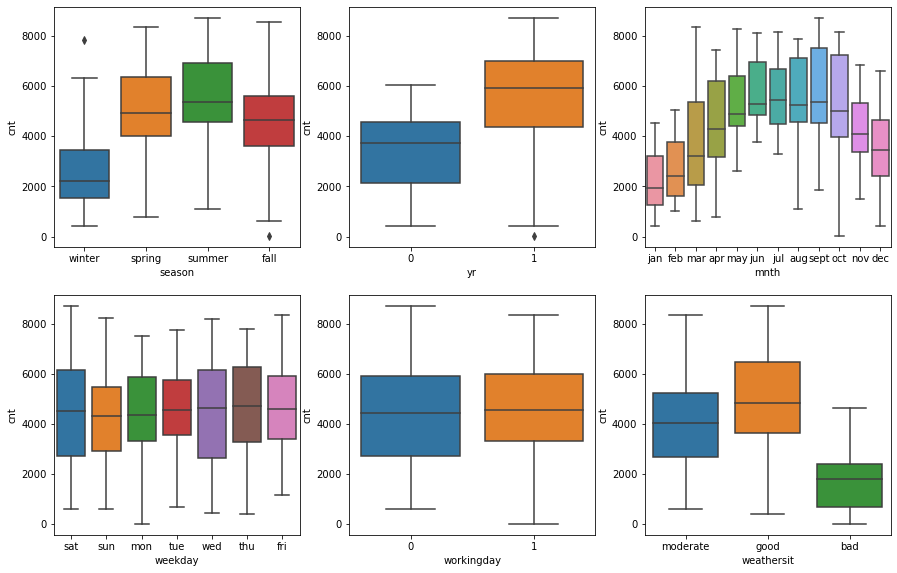

In [31]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data = data, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:summer has highest demand for rental bikes
    2. Demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

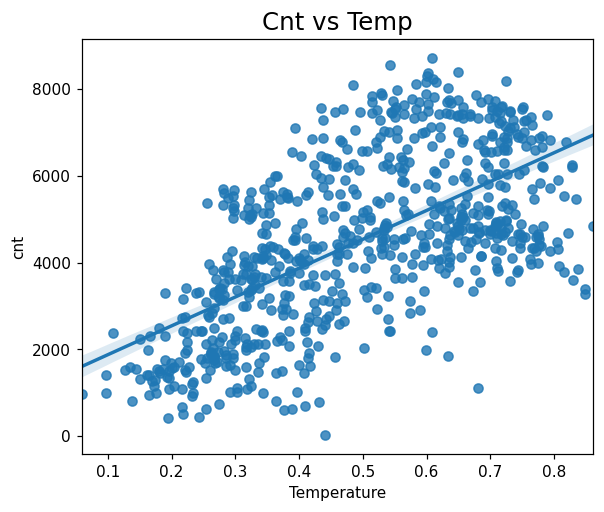

In [32]:
plt.figure(figsize = (6,5),dpi = 110)
plt.title("Cnt vs Temp",fontsize = 16)
sns.regplot(data = data,y = "cnt",x = "temp")
plt.xlabel("Temperature")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- One can see that cnt is linearly increasing with temp indicating linear relation.

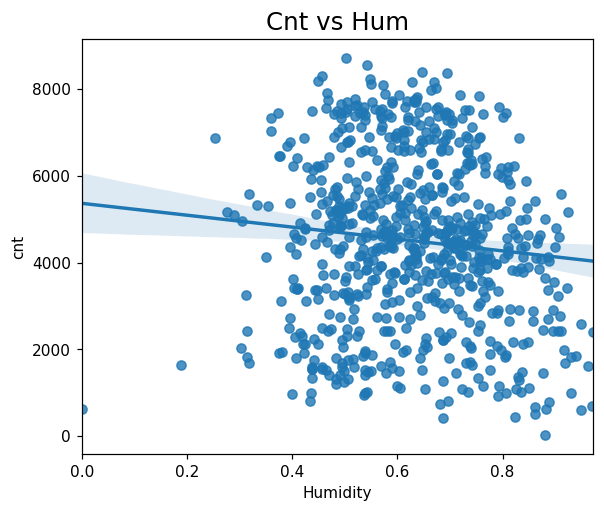

In [33]:
plt.figure(figsize = (6,5), dpi = 110)
plt.title("Cnt vs Hum", fontsize = 16)
sns.regplot(data = data, y = "cnt", x = "hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- Hum values are more scattered.
- Although one can see that cnt decreasing with increase in humidity.

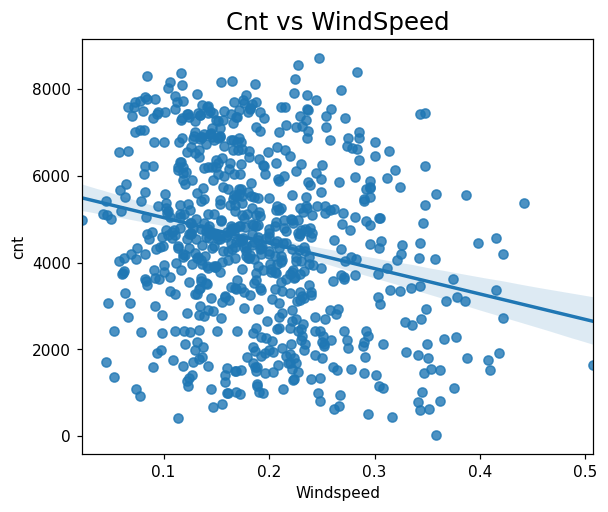

In [34]:
plt.figure(figsize = (6,5), dpi = 110)
plt.title("Cnt vs WindSpeed", fontsize = 16)
sns.regplot(data = data, y = "cnt", x= "windspeed")
plt.xlabel("Windspeed")
plt.show()

#### _`Inference`_:
- Windspeed values are also more scattered.
- Although one can see cnt decreasing with increase in windspeed.

#### Correlation between numeric features

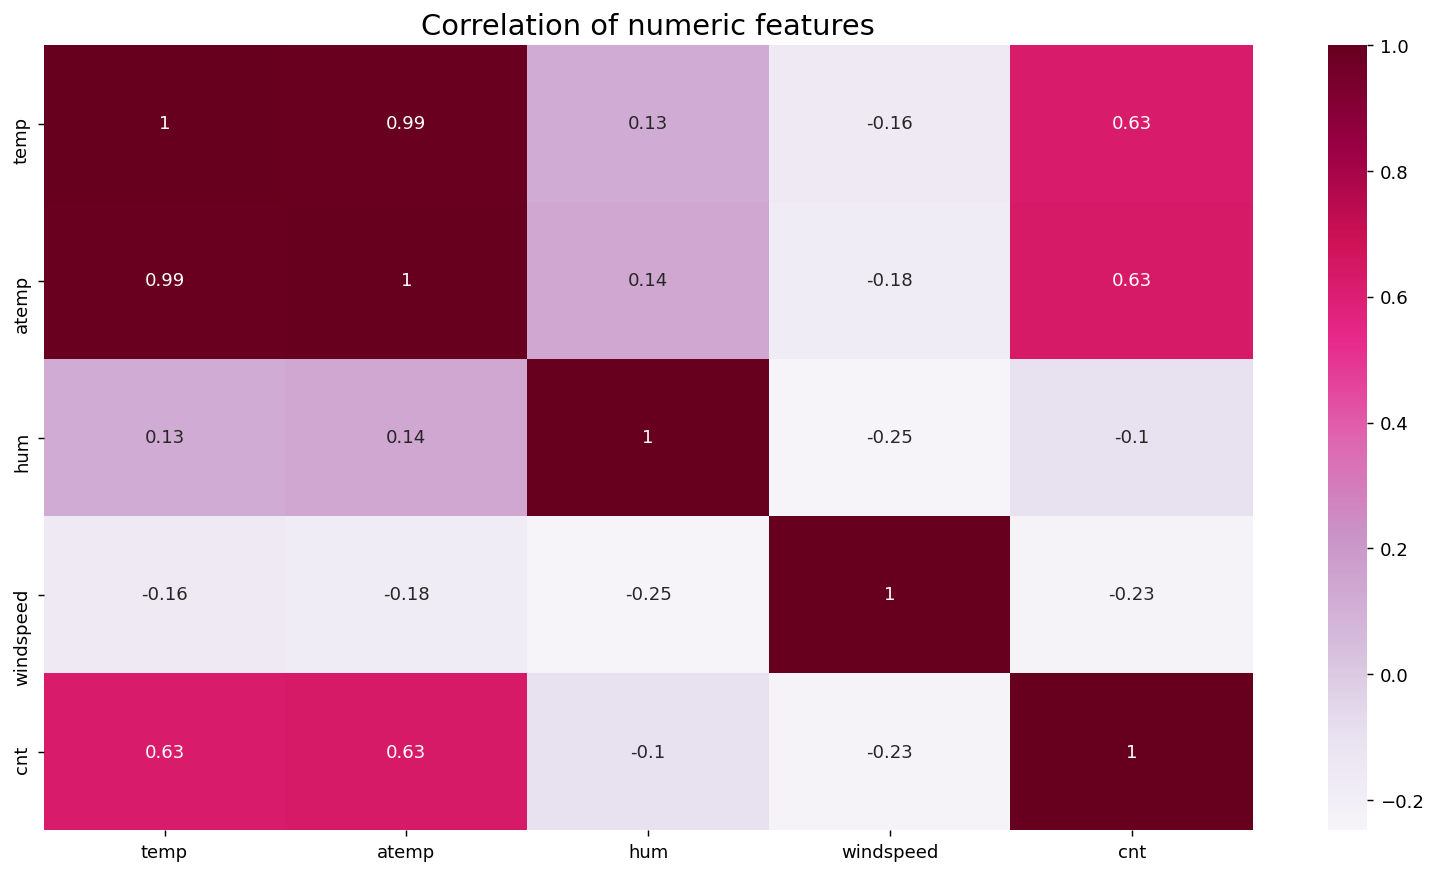

In [35]:
num_features = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.figure(figsize = (15,8), dpi = 130)
plt.title("Correlation of numeric features", fontsize = 16)
sns.heatmap(data[num_features].corr(), annot= True, cmap = "PuRd")
plt.show()

- Apart from `temp` and `atemp`, correlation between `temp` and `atemp` with `cnt` also higher

In [36]:
data.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,0.683995,0.495385,0.474354,0.627894,0.190486,4504.348837,365.000000
std,0.500342,0.465233,0.183051,0.162961,0.142429,0.077498,1937.211452,211.165812
min,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,22.000000,0.000000
25%,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,3152.000000,182.500000
50%,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000,365.000000
75%,1.000000,1.000000,0.655417,0.608602,0.730209,0.233214,5956.000000,547.500000
max,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,8714.000000,730.000000


### Create dummy variables for all categorical variables

In [37]:
data = pd.get_dummies(data = data, columns = ["season","mnth","weekday"], drop_first=True)
data = pd.get_dummies(data = data, columns = ["weathersit"])

In [38]:
data.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [39]:
data.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,2,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,3,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,4,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
data.mnth_feb.nunique()

2

# Train-test Split

In [41]:
data.shape

(731, 31)

In [42]:
data.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,2,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,3,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,4,0,0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
#y to contain only target variable
y = data.pop('cnt')

In [44]:
#X is all remainign variable also our independent variables
x = data

In [45]:
#split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5,shuffle=True)

In [46]:
x.shape

(731, 30)

In [47]:
x.head()

,yr,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0.344167,0.363625,0.805833,0.160446,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0.196364,0.189405,0.437273,0.248309,2,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0.200000,0.212122,0.590435,0.160296,3,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0.226957,0.229270,0.436957,0.186900,4,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [48]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(584, 30)
(147, 30)


# Others Libraries

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

- Making all features in same scale to interpret easily 

- Following columns are continous to be scaled `temp`, `hum`, `windspeed`

#### The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

- I have taken help of RFE from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html this website.

# Model Building

In [50]:
# Scaling continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

<ipython-input-50-56e34672ef13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [51]:
X_train.describe()

,yr,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.506849,0.698630,0.537203,0.512134,0.646703,0.406959,0.500619,0.253425,0.268836,0.238014,...,0.083904,0.148973,0.136986,0.138699,0.138699,0.138699,0.143836,0.027397,0.638699,0.333904
std,0.500382,0.459246,0.241355,0.218021,0.145054,0.187771,0.289842,0.435345,0.443734,0.426233,...,0.277482,0.356367,0.344128,0.345928,0.345928,0.345928,0.351224,0.163378,0.480789,0.472010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.326818,0.326625,0.538775,0.266682,0.250342,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.549920,0.538038,0.643959,0.385756,0.507534,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.748941,0.693559,0.749893,0.511840,0.753767,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
X_train.head()

,yr,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
242,0,1,0.744235,0.690354,0.614825,0.145386,0.331507,0,1,0,...,0,0,0,0,0,0,1,0,1,0
598,1,1,0.734271,0.676749,0.692802,0.120187,0.819178,0,1,0,...,0,0,0,0,0,1,0,0,1,0
232,0,0,0.816203,0.777145,0.791774,0.540023,0.317808,0,1,0,...,0,0,0,1,0,0,0,0,1,0
456,1,0,0.437539,0.429142,0.695373,0.357551,0.624658,1,0,0,...,0,0,0,1,0,0,0,0,0,1
369,1,1,0.224955,0.241993,0.538989,0.256686,0.505479,0,0,1,...,0,0,0,0,1,0,0,0,1,0


### Build a model using RFE(Recursive Feature Elimination) and Automated approach

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
rfe = RFE(lr, 15)
rfe.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [55]:
#Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 2),
 ('season_spring', False, 3),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 5),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 11),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 12),
 ('mnth_may', False, 8),
 ('mnth_nov', False, 6),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 16),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 15),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [56]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [57]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [58]:
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['days_old', 'season_spring', 'mnth_aug', 'mnth_dec', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [60]:
X_train_rfe = X_train[['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']]

In [61]:
X_train_rfe.shape

(584, 14)

In [62]:
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     216.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.12e-217
Time:                        19:24:01   Log-Likelihood:                -4707.9
No. Observations:                 584   AIC:                             9446.
Df Residuals:                     569   BIC:                             9511.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3089.2226    293.090     

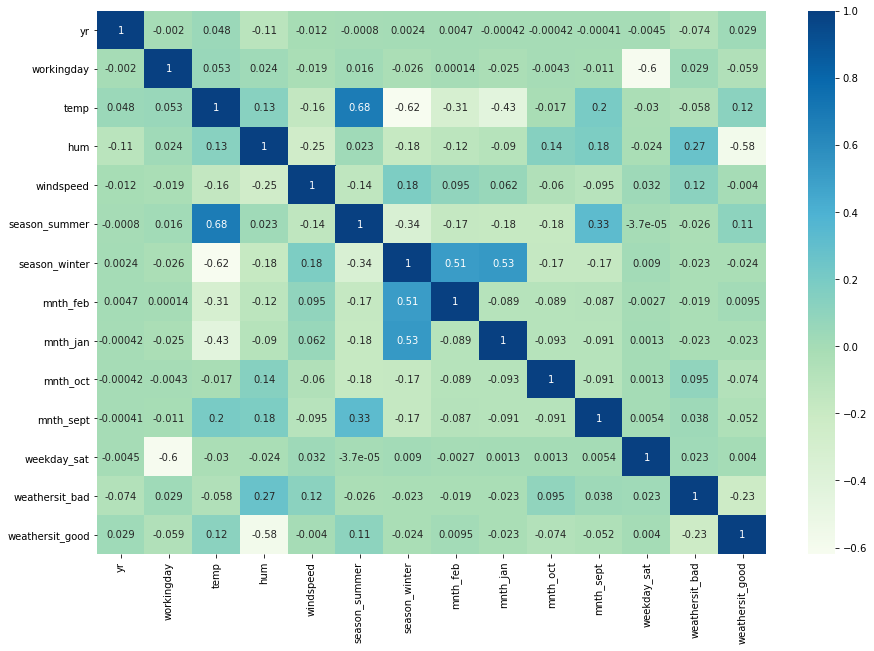

In [63]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(data[['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

In [64]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     230.8
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.68e-217
Time:                        19:24:04   Log-Likelihood:                -4710.9
No. Observations:                 584   AIC:                             9450.
Df Residuals:                     570   BIC:                             9511.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3036.9724    293.539     

In [65]:
# Dropping the variable mnth_feb as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     250.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.63e-218
Time:                        19:24:04   Log-Likelihood:                -4711.0
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     571   BIC:                             9505.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3034.2973    293.314     

In [66]:
#Build a model with all columns to select features automatically
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [67]:
#Let us build the finalmodel using sklearn
cols =  ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

3034.297319361872 [ 2041.93690877   421.12113197  3434.44606718 -1722.37060682
 -1296.39301066  -396.3488712  -1313.15006204   519.23192147
   816.8578928    595.3755616  -1575.00231744   404.10571363]


# Model evaluation

In [68]:
y_train_pred = lr.predict(X_train[cols])

In [69]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


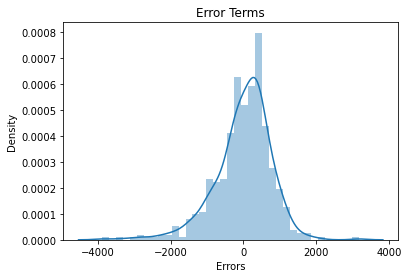

In [70]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

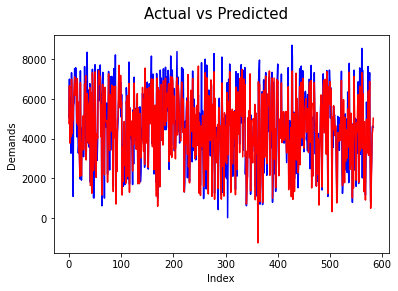

In [71]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems fine

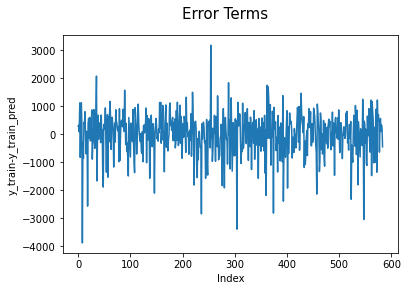

In [72]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here, If one can see the error terms are independent of each other.

In [73]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8402603080498043

### _`Inference`_
R2_score same as we obtained in final model

### Linearity Check

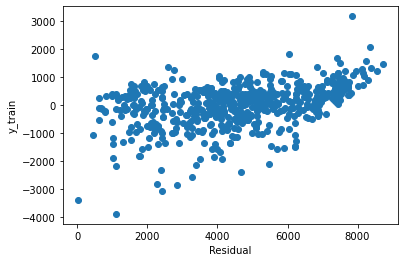

In [74]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [75]:
#Scale variables in X_test
num_vars = ['temp','hum','atemp','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

<ipython-input-75-2c24083ad46c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_vars] = scaler.transform(X_test[num_vars])
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [76]:
#Columns from our final model
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 7.4 R-Squared value for test predictions

In [77]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8199411415117103

### Homoscedacity- assumption being same variance of error term

##### _`Inference`_ 
R2 value for predictions on test data (0.819) is almost same as R2 value of train data(0.840). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

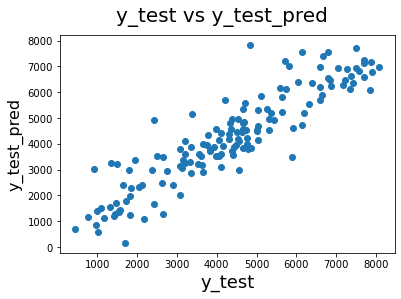

In [78]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)

####  _`Inference`_
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

### plot test vs predicted values

In [79]:
#Function to plot Actual vs Predicted
#Takes Actual and Predicted values as input along with the scale
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)             
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Counts', fontsize=16)                               

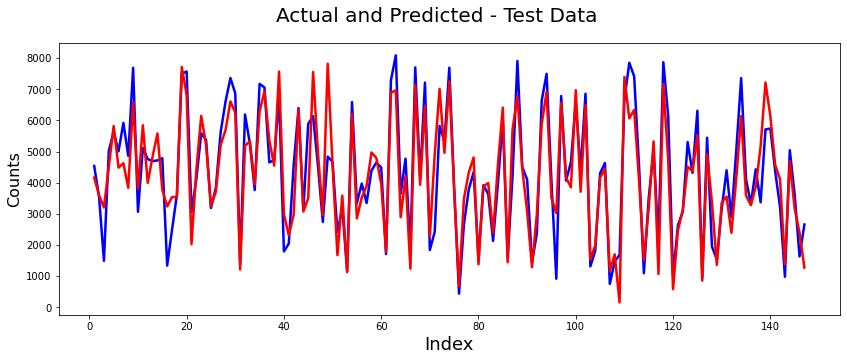

In [80]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### _`Inference`_
As we can see predictions for test data is close to actuals

### Plot error terms for test data

In [81]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,148,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)          
    plt.xlabel('Index', fontsize=18)                    
    plt.ylabel('Counts - Predicted Counts', fontsize=16)           

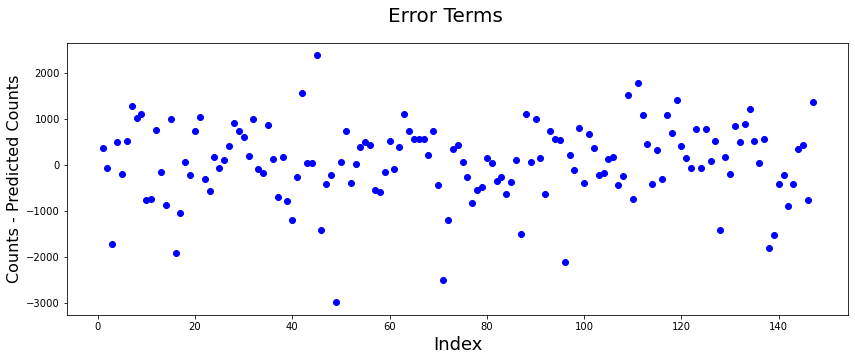

In [82]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### _`Inference`_
As one can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [83]:
data.head()

,yr,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0.344167,0.363625,0.805833,0.160446,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0.196364,0.189405,0.437273,0.248309,2,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0.200000,0.212122,0.590435,0.160296,3,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0.226957,0.229270,0.436957,0.186900,4,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### Interpreting the model

In [84]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     250.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.63e-218
Time:                        19:24:08   Log-Likelihood:                -4711.0
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     571   BIC:                             9505.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3034.2973    293.314     

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season(summer, winter)
- months(January, September, February, October)
- Sunday
- weathersit(Clear, Light Snow, Mist + Cloudy)

# Multiple Linear regression

In [85]:
mlr = LinearRegression().fit(X_train, y_train)

In [86]:
print('Coeffient of determination = ', mlr.score(X_train, y_train))
y_pred = mlr.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred))

Coeffient of determination =  0.8480719056326338
r2 score =  0.8338692532458207


# Ridge

In [87]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

In [88]:
print('Coeffient of determination = ', ridge.score(X_train, y_train))

Coeffient of determination =  0.8464274824452609


# Lasso

In [89]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [90]:
y_pred_lasso = lasso.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred_lasso))

r2 score =  0.8326133458181355


### Plot

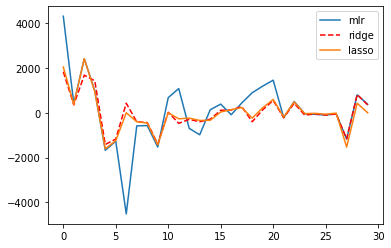

In [91]:
plt.plot(mlr.coef_)
plt.plot(ridge.coef_, 'r--')
plt.plot(lasso.coef_)
plt.legend(['mlr','ridge',  'lasso']);